# Chapter 9

## Understanding the problem space

# Setup

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

### Create conda env

conda create -n ch_10 python=3.9 scikit-learn


### Launch Jupyter Notebook


launch Jupyter Notebook from conda, or Navigator

### Load in data

In [2]:
import pandas as pd

df_red =  pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df_white =  pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [3]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df_white.shape

(4898, 12)

In [6]:
df_red["wine_type"] = 1
df_white["wine_type"] = 0

In [7]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [8]:
df_raw = pd.concat([df_red,df_white])
df_raw

# Don't use merge as thats when there are overlapping elements in the datasets

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [9]:
df_raw.iloc[[0,1,-2,-1]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [10]:
df_raw.iloc[[0,1,-2,-3]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0


In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [12]:
df_raw.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4888, 4889, 4890, 4891, 4892, 4893, 4894, 4895, 4896, 4897],
           dtype='int64', length=6497)

In [13]:
df_raw[["fixed acidity","residual sugar","density",  "alcohol", "quality"]].describe()

,fixed acidity,residual sugar,density,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,5.443235,0.994697,10.491801,5.818378
std,1.296434,4.757804,0.002999,1.192712,0.873255
min,3.800000,0.600000,0.987110,8.000000,3.000000
25%,6.400000,1.800000,0.992340,9.500000,5.000000
50%,7.000000,3.000000,0.994890,10.300000,6.000000
75%,7.700000,8.100000,0.996990,11.300000,6.000000
max,15.900000,65.800000,1.038980,14.900000,9.000000


### Basic shape

In [14]:
df_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


### Check for missing values

In [15]:
df_raw.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [16]:
df_raw['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

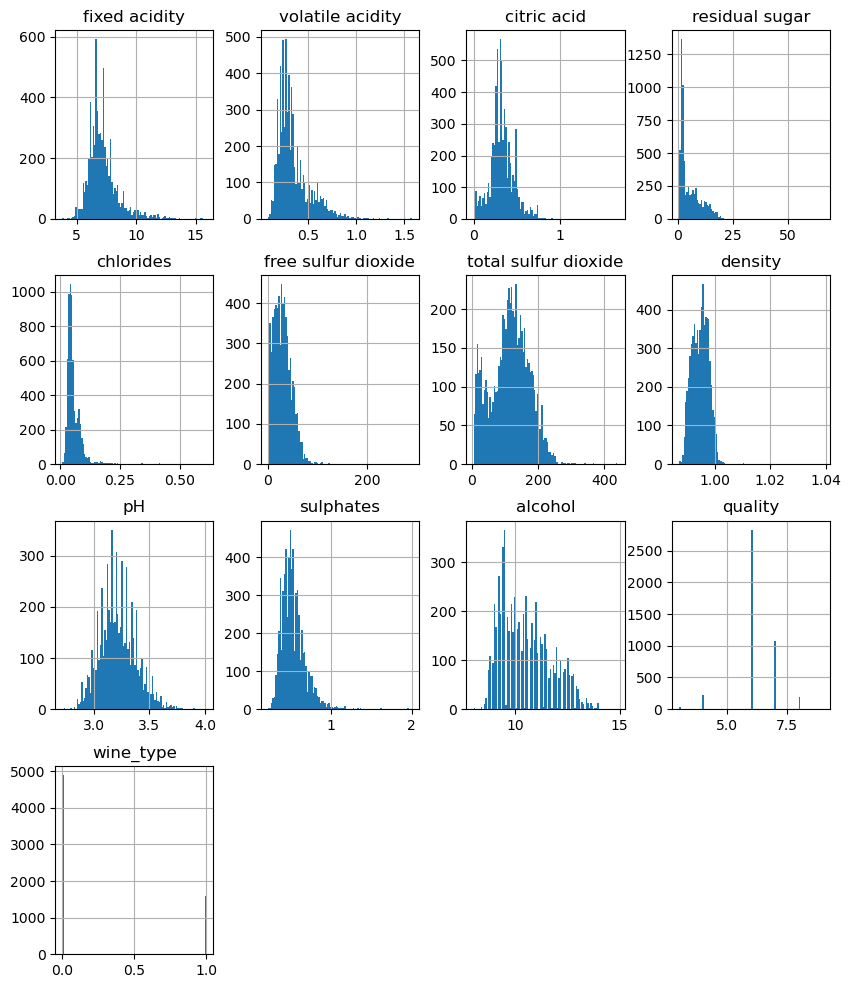

In [17]:
import matplotlib.pyplot as plt

df_raw.hist(bins = 100, figsize = (10,12))
plt.show()

In [18]:
df_raw[df_raw['quality']>7].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,6.850000,0.291187,0.333889,5.351010,0.040778,34.505051,117.479798,0.992487,3.225354,0.511313,11.691414,8.025253,0.090909
std,1.144918,0.118123,0.102157,4.161541,0.015679,17.084070,41.693584,0.002883,0.156431,0.164466,1.273262,0.157289,0.288209
min,3.900000,0.120000,0.030000,0.800000,0.014000,3.000000,12.000000,0.987130,2.880000,0.250000,8.500000,8.000000,0.000000
25%,6.200000,0.210000,0.280000,2.000000,0.030250,24.000000,96.000000,0.990350,3.130000,0.380000,11.000000,8.000000,0.000000
50%,6.800000,0.275000,0.320000,4.050000,0.036500,34.000000,118.500000,0.991780,3.230000,0.480000,12.000000,8.000000,0.000000
75%,7.300000,0.350000,0.367500,7.575000,0.045000,43.000000,145.000000,0.994075,3.330000,0.600000,12.600000,8.000000,0.000000
max,12.600000,0.850000,0.740000,14.800000,0.121000,105.000000,212.500000,1.000600,3.720000,1.100000,14.000000,9.000000,1.000000


In [19]:
high_qaul_wine = df_raw[df_raw['quality']>=7]['alcohol']
high_qaul_wine

7       10.00
8        9.50
16      10.50
37       9.70
62       9.50
        ...  
4870    11.45
4876    11.60
4886    12.15
4887    13.00
4896    12.80
Name: alcohol, Length: 1277, dtype: float64

In [20]:
low_qaul_wine = df_raw[df_raw['quality']<6]['alcohol']
low_qaul_wine

0        9.4
1        9.8
2        9.8
4        9.4
5        9.4
        ... 
4882    10.7
4884     9.6
4888     9.2
4892     9.7
4894     9.6
Name: alcohol, Length: 2384, dtype: float64

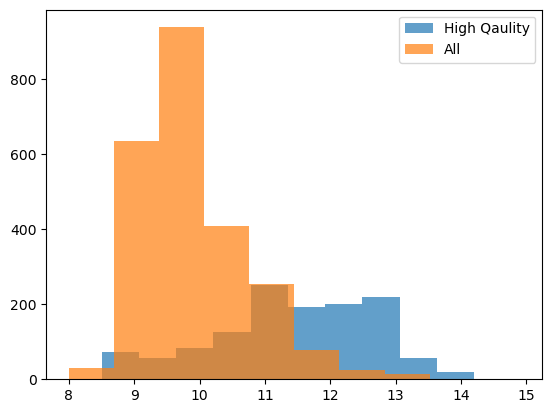

In [21]:
high_qaul_wine = df_raw[df_raw['quality']>=7]['alcohol']
low_qaul_wine = df_raw[df_raw['quality']<6]['alcohol']

plt.hist(high_qaul_wine, bins = 10,alpha=0.7, label='High Qaulity')
plt.hist(low_qaul_wine, bins = 10,alpha=0.7, label='All')
plt.legend(loc='upper right')

plt.show()

## Check for redundant features

The correlation is just returns a dataframe so we can take and manipulate as needed.

In [22]:
corr_matrix = df_raw.corr().round(2)

In [23]:
corr_matrix = corr_matrix.applymap(lambda x: abs(x))
corr_matrix[corr_matrix > .4].style.background_gradient(cmap='Reds')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
fixed acidity,1.000000,nan,nan,nan,nan,nan,nan,0.460000,nan,nan,nan,nan,0.490000
volatile acidity,nan,1.000000,nan,nan,nan,nan,0.410000,nan,nan,nan,nan,nan,0.650000
citric acid,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
residual sugar,nan,nan,nan,1.000000,nan,nan,0.500000,0.550000,nan,nan,nan,nan,nan
chlorides,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,0.510000
free sulfur dioxide,nan,nan,nan,nan,nan,1.000000,0.720000,nan,nan,nan,nan,nan,0.470000
total sulfur dioxide,nan,0.410000,nan,0.500000,nan,0.720000,1.000000,nan,nan,nan,nan,nan,0.700000
density,0.460000,nan,nan,0.550000,nan,nan,nan,1.000000,nan,nan,0.690000,nan,nan
pH,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan
sulphates,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,0.490000


In [24]:
corr_matrix[['total sulfur dioxide','free sulfur dioxide']]

,total sulfur dioxide,free sulfur dioxide
fixed acidity,0.33,0.28
volatile acidity,0.41,0.35
citric acid,0.20,0.13
residual sugar,0.50,0.40
chlorides,0.28,0.20
free sulfur dioxide,0.72,1.00
total sulfur dioxide,1.00,0.72
density,0.03,0.03
pH,0.24,0.15
sulphates,0.28,0.19


From this we see that "free sulfur dioxide" has the higher correlation, so we should keep that and drop "total sulfur dioxide"

In [25]:
df = df_raw.drop('total sulfur dioxide', axis = 1)
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.7,0.0,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,1


## Focusing on the most important features 

In [26]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.00
alcohol                 0.44
density                 0.31
volatile acidity        0.27
chlorides               0.20
wine_type               0.12
citric acid             0.09
fixed acidity           0.08
free sulfur dioxide     0.06
residual sugar          0.04
total sulfur dioxide    0.04
sulphates               0.04
pH                      0.02
Name: quality, dtype: float64

## Prepparing the data for training

### Scaling the data

### Split into train and test split

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(['quality'],axis=1)
y = df['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [28]:
# https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()

minmax_scaled_X_train = min_max_scaler.fit_transform(X_train)
std_scaled_X_train = std_scaler.fit_transform(X_train)

## MinMax normilization

In [29]:
minmax_scaled_X = pd.DataFrame(minmax_scaled_X_train,columns=X.columns)
minmax_scaled_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,0.322314,0.126667,0.276423,0.018405,0.031561,0.086806,0.076923,0.209302,0.146067,0.594203,0.0
1,0.454545,0.383333,0.211382,0.021472,0.144518,0.013889,0.197995,0.410853,0.112360,0.231884,1.0
2,0.115702,0.190000,0.065041,0.197853,0.053156,0.125000,0.190669,0.573643,0.095506,0.275362,0.0
3,0.272727,0.026667,0.243902,0.038344,0.014950,0.048611,0.056487,0.232558,0.168539,0.565217,0.0
4,0.272727,0.113333,0.398374,0.036810,0.034884,0.100694,0.061500,0.317829,0.095506,0.623188,0.0


## Standard Normalization

In [30]:
df_std_scaled_X = pd.DataFrame(std_scaled_X_train,columns=X.columns)
df_std_scaled_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,0.381064,-0.423337,0.152051,-0.760512,-0.823288,-0.252791,-1.193663,-1.427794,-0.353286,1.350852,-0.570462
1,1.627107,1.935953,-0.403749,-0.718933,1.196375,-1.431326,0.883971,0.190390,-0.753802,-0.744294,1.752964
2,-1.565878,0.158825,-1.654300,1.671851,-0.437176,0.364536,0.758254,1.497385,-0.954059,-0.492877,-0.570462
3,-0.086202,-1.342542,-0.125849,-0.490250,-1.120297,-0.870119,-1.544346,-1.241081,-0.086276,1.183240,-0.570462
4,-0.086202,-0.545898,1.194176,-0.511039,-0.763886,-0.028309,-1.458330,-0.556464,-0.954059,1.518464,-0.570462


## Evaluating potential models

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

kfold = StratifiedKFold(n_splits=3, random_state=33, shuffle=True)

lr_cve = cross_val_score(LinearRegression(), minmax_scaled_X, y_train, cv=kfold, scoring='neg_median_absolute_error')
knn_cve = cross_val_score(KNeighborsRegressor(), minmax_scaled_X, y_train, cv=kfold, scoring='neg_median_absolute_error')
svm_cve = cross_val_score(SVR(), minmax_scaled_X, y_train, cv=kfold, scoring='neg_median_absolute_error')

In [32]:
print(f'Linear Regression MSE score: {lr_cve.mean()}')
print(f'KNN MSE score:{knn_cve.mean()}')
print(f'SVM MSE score: {svm_cve.mean()}')

Linear Regression MSE score: -0.46669423095245016
KNN MSE score:-0.40000000000000036
SVM MSE score: -0.434750731766528


In [33]:
kfold = StratifiedKFold(n_splits=3, random_state=33, shuffle=True)

lr_cve = cross_val_score(LinearRegression(), df_std_scaled_X, y_train, cv=kfold, scoring='neg_median_absolute_error')
knn_cve = cross_val_score(KNeighborsRegressor(), df_std_scaled_X, y_train, cv=kfold, scoring='neg_mean_squared_error')
svm_cve = cross_val_score(SVR(), df_std_scaled_X, y_train, cv=kfold, scoring='neg_mean_squared_error')

In [34]:
print(f'Linear Regression MSE score: {lr_cve.mean()}')
print(f'KNN MSE score:{knn_cve.mean()}')
print(f'SVM MSE score: {svm_cve.mean()}')

Linear Regression MSE score: -0.4666942309524506
KNN MSE score:-0.5033205843902295
SVM MSE score: -0.46251362844866567


# Training your models

## Training a SVM

In [35]:
# from sklearn.pipeline import make_pipeline
svm_model = SVR().fit(df_std_scaled_X, y_train)

## Analyzing Regression model results with MSE and R2 score

## Training an SVM 

In [36]:
svr_model = SVR().fit(df_std_scaled_X, y_train) 

X_test_scaled = min_max_scaler.fit_transform(X_test)

y_pred_svr = svr_model.predict(X_test_scaled) 
y_pred_svr

/home/gregorywpower/anaconda3/envs/BuildingDSSWithAnaconda/lib/python3.10/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([6.11350391, 5.90966781, 5.83901199, ..., 5.86438126, 5.88402381,
       5.79021709])

## Training a KNN

In [37]:
knn_model = KNeighborsRegressor().fit(minmax_scaled_X, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

/home/gregorywpower/anaconda3/envs/BuildingDSSWithAnaconda/lib/python3.10/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [38]:
from sklearn.metrics import mean_squared_error 
MSE_knn = mean_squared_error(y_test,y_pred_knn)
print(MSE_knn)

0.7878461538461539


## Linear Regression

In [39]:
y_train

1281    7
763     5
1310    6
2518    7
1467    7
       ..
1674    6
1107    7
578     5
4249    6
840     7
Name: quality, Length: 5197, dtype: int64

In [40]:
lr = LinearRegression().fit(X_train, y_train)
print(lr)

LinearRegression()


In [41]:
y_pred = lr.predict(X_test)
y_pred

array([6.6529292 , 6.0080115 , 5.84120378, ..., 5.94604136, 5.15573659,
       5.28313365])

In [42]:
print(y_pred[5:20])

[6.42816327 5.71663918 4.84094667 6.68483771 4.81744289 6.13636417
 5.7446239  6.12117822 6.44034694 6.08384376 5.31858806 6.15756143
 5.53727849 6.32878852 6.04154761]


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE_lr = mean_absolute_error(y_test,y_pred)
print(f'{MSE_lr:.2f}')

0.58


In [44]:
from sklearn.metrics import r2_score

r2_wine = r2_score(y_test,y_pred)
print(f'{r2_wine:.2f}')

0.28
